# Do logarithmic proximity measures outperform plain ones in graph clustering?

In [1]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('../..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import adjusted_rand_score
from joblib import Parallel, delayed
from collections import defaultdict

In [3]:
from pygraphs.graphs.generator import StochasticBlockModel
from pygraphs.graphs.dataset import football, polbooks, zachary, news_2cl_1, news_2cl_2, news_2cl_3, news_3cl_1, news_3cl_2, news_3cl_3
from pygraphs.measure import H_kernels_plus_RSP_FE
from pygraphs.cluster.ward import Ward
from pygraphs.scenario import ParallelByGraphs, measures_right_order, d3_right_order
from pygraphs.util import load_or_calc_and_save, configure_logging
from pygraphs.scorer import copeland

In [4]:
import logging
configure_logging()
logger = logging.getLogger()

## 6. Cluster analysis on several classical datasets

For each dataset and each measure family, we sorted 55 values of the family parameter in the descending order of the
corresponding ARI. ARI against the rank of the family parameter value is shown in Fig. 9.

In [5]:
all_datasets = [
    football,
    polbooks,
    # polblogs,
    zachary,
    news_2cl_1, news_2cl_2, news_2cl_3,
#     news_3cl_1, news_3cl_2, news_3cl_3,
#     news_5cl_1, news_5cl_2, news_5cl_3
]


In [6]:
def perform(classic_plot, dataset):
    dataset_results = {}
    graphs, info = dataset
    print(info)
    for measure_class in tqdm(H_kernels_plus_RSP_FE, desc=info['name']):
        x, y, error = classic_plot.perform(Ward, measure_class, graphs, info['k'], n_jobs=1)
        dataset_results[measure_class.name] = (x, y)
    print(info['name'], 'completed')
    return info['name'], dataset_results


@load_or_calc_and_save('results/6_1b.pkl')
def calc():
    classic_plot = ParallelByGraphs(adjusted_rand_score, np.linspace(0, 1, 51), progressbar=False)
    return dict(Parallel(n_jobs=6)(delayed(perform)(classic_plot, dataset) for dataset in all_datasets))

results = calc()

news_2cl_1


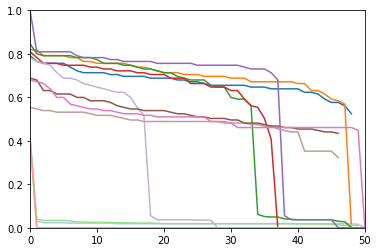

polbooks


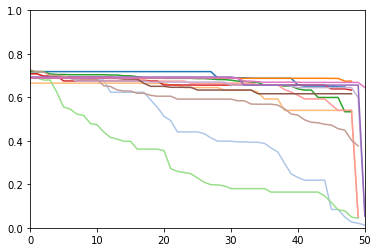

news_2cl_2


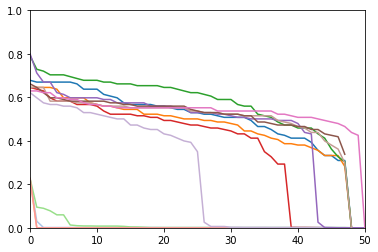

news_2cl_3


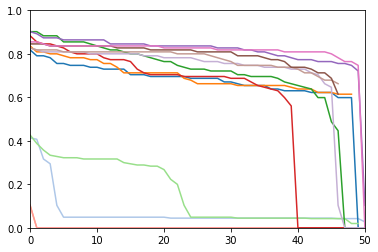

zachary


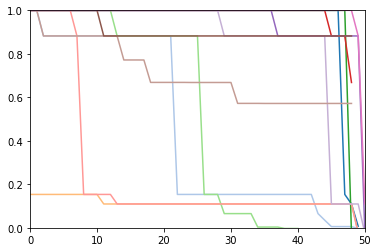

football


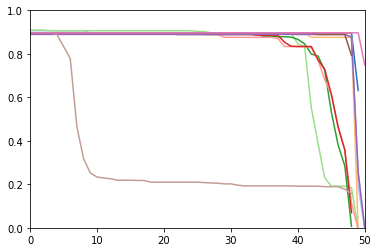

In [7]:
for dataset_name, measure_results in results.items():
    print(dataset_name)
    d3c = (x for x in d3_right_order)
    for measure_name in measures_right_order:
        x, y = measure_results[measure_name]
        plt.plot(range(len(y)), sorted(y, reverse=True), color=d3c.__next__())
    plt.xlim(0, 50)
    plt.ylim(0, 1)
    plt.show()